# Part II - Factors that determine the duration of a trip
## by Caleb Chijindu Ugorji

## Investigation Overview

> In this investigation, I wanted to look at the characteristics of the members and the day of the week and time of the day that could be used to determine the duration of a trip by a member



## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area throughout the month of February 2019 and was obtained from https://www.fordgobike.com/system-data. Data consists of info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe( loaded the cleaned data)
gobike = pd.read_csv('gobike_clean.csv')
gobike

,duration_sec,user_type,member_gender,start_day,start_dayname,age,trip_kind,start_hour,trip_distance(km),trip_speed(km/hr)
0,52185,Customer,Male,28,Thursday,35,very_long,17,0.54,0.04
1,61854,Customer,Male,28,Thursday,47,very_long,12,2.71,0.16
2,36490,Subscriber,Other,28,Thursday,30,very_long,17,0.26,0.03
3,1585,Subscriber,Male,28,Thursday,45,very_long,23,2.41,5.47
4,1793,Subscriber,Male,28,Thursday,60,very_long,23,3.33,6.69
...,...,...,...,...,...,...,...,...,...,...
174947,480,Subscriber,Male,1,Friday,23,intermediate,0,1.47,11.03
174948,313,Subscriber,Male,1,Friday,35,short,0,1.40,16.10
174949,141,Subscriber,Male,1,Friday,29,short,0,0.38,9.70
174950,139,Subscriber,Male,1,Friday,31,short,0,0.75,19.42


## Distribution of Trip duration


> The trip duration in the dataset take on a very large range of values, from about 61 seconds at the lowest to about 84548 seconds at the highest. Plotted on a logarithmic scale, the distribution of the trip duration takes on a normal distribution.


<Figure size 576x360 with 0 Axes>

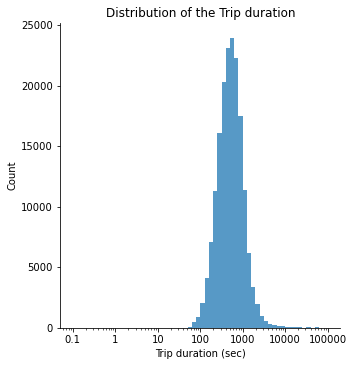

In [3]:
log_binsize = 0.1
bins = 10**np.arange(-1, np.log10(gobike['duration_sec'].max())+log_binsize, log_binsize)
plt.figure(figsize = [8, 5]);

#ploting the distribution on a log scale
sb.displot(gobike.duration_sec, bins = bins, kde = False)
plt.title('Distribution of the Trip duration')
plt.xlabel('Trip duration (sec)')
plt.xscale('log')

# setting the tick locations and labels
ticks = [0.1, 1, 10, 100, 1000, 10000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);

## Age distribution

> The age distribution of the members is screwed to the left with peak between 25 and 40 years

<Figure size 720x360 with 0 Axes>

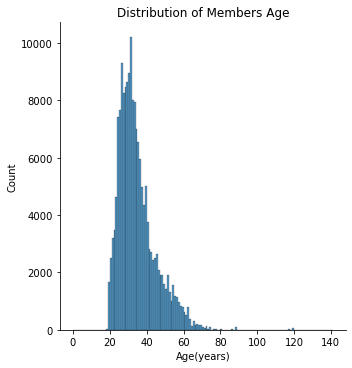

In [4]:
# the age distribution
binsize = 1
bin_edges = np.arange(0, gobike.age.max() + binsize, binsize)
plt.figure(figsize = [10, 5])
sb.displot(gobike.age, bins = bin_edges, kde = False)
plt.title('Distribution of Members Age')
plt.xlabel('Age(years)');

In [5]:
gobike.drop(gobike[(gobike.age > 80)].index, inplace = True)

## Trip duration vs age
The trip duration and the member age follows a trend. There was an initial increase in trip duration as memner age move from about 20 years to about 35 years then there was generally a decline trip duration as the member age moved from 35 years to 80 years with just a few deviations. 



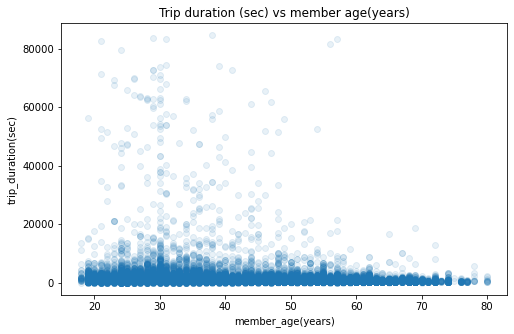

In [6]:
plt.figure(figsize = [8,5])
plt.scatter(data = gobike, y = 'duration_sec', x = 'age', alpha = 1/10)

plt.title('Trip duration (sec) vs member age(years)')
plt.xlabel('member_age(years)')
plt.ylabel('trip_duration(sec)')

plt.show();


## Average Trip Duration vs Member Gender
Gender affected trip duration of the members with the 'other' gender having the highest average trip duration, followed by the female gender then the male gender. 

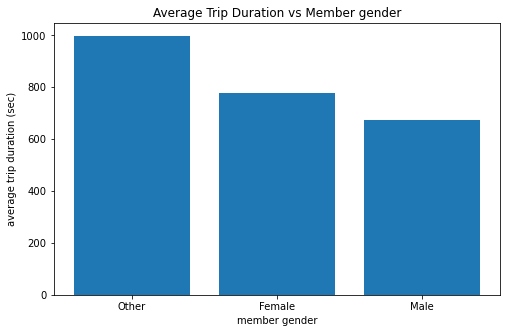

In [7]:
# average trip duration against member gender
#grouping the data by member_gender
first = gobike.groupby('member_gender')['duration_sec'].mean().sort_values(ascending = False)

plt.figure(figsize = [8, 5])

plt.title('Average Trip Duration vs Member gender')

plt.bar(first.index, first.values)
plt.ylabel('average trip duration (sec)')
plt.xlabel('member gender');

## Average Trip Duration vs Start_day
The bar plot shows that longer trips are generally taken in the weekends with sunday being the highest

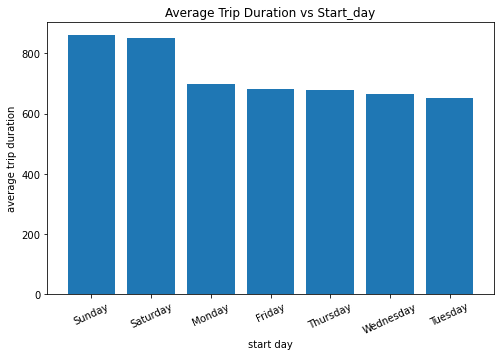

In [8]:
# average trip duration against start_day
#grouping the data by start day
sd = gobike.groupby('start_dayname')['duration_sec'].mean().sort_values(ascending = False)

#ploting the bar graph
plt.figure(figsize = [8, 5])

plt.title('Average Trip Duration vs Start_day')
plt.bar(sd.index, sd.values)
plt.xlabel('start day')
plt.ylabel('average trip duration')
plt.xticks(rotation = 25);

## Average trip duration vs start hour
Start hour of a trip can be used in predicting a trips duration. Most trips with high trip duration are started in the earliest part of the day with peak average around 2 am to 4 am in the morning. 

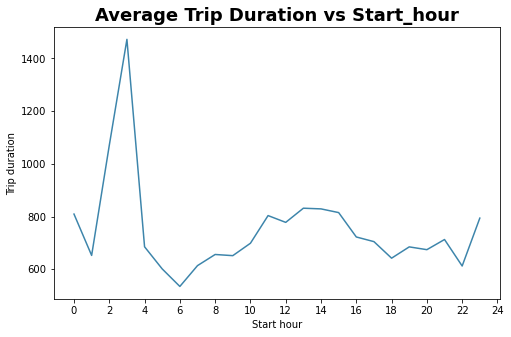

In [9]:
gobike.groupby('start_hour')['duration_sec'].mean().plot(kind='line', figsize=(8,5) ,color='#3d85ab')
plt.title('Average Trip Duration vs Start_hour' , fontsize=18 , fontweight='bold')
plt.ylabel('Trip duration')
plt.xlabel('Start hour')
plt.xticks([x for x in range(0,25, 2)])
plt.yticks(rotation=360);
plt.show()

## Trip kind vs Gender
A categorical variable, trip kind was created that that classifies the trips into short, intermediate, long and very long based on the trip duration. Of the trips undergone by the male gender, short trips had the highest count followed by the intermediate trips, then long trips and finally very long trips. The female and the 'Other' gender, however, followed the reverse order with very_long trips as trips with the most count, followed by long trips, then intermediate trips and lastly, short trips. Their proportions also followed the same trend.

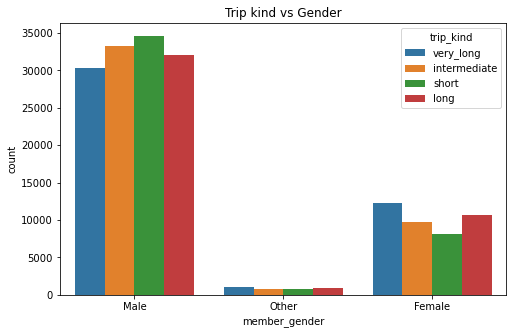

In [10]:
plt.figure(figsize = [8,5])
sb.countplot(data = gobike, x = 'member_gender', hue = 'trip_kind')
plt.title('Trip kind vs Gender');


In [11]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve 

^C
